# <center> PREDICTING CINEMA TICKET SALES

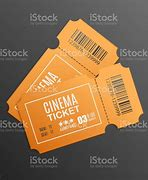

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import klib as k
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('./cinemaTicket_Ref.csv')


In [3]:
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [4]:
data.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
film_code,142524.0,1.518985e+03,3.618445e+01,1471.000000,1.485000e+03,1.498000e+03,1.556000e+03,1.589000e+03
cinema_code,142524.0,3.203784e+02,1.597012e+02,32.000000,1.810000e+02,3.240000e+02,4.740000e+02,6.370000e+02
total_sales,142524.0,1.234728e+07,3.065486e+07,20000.000000,1.260000e+06,3.720000e+06,1.110000e+07,1.262820e+09
tickets_sold,142524.0,1.401376e+02,2.797587e+02,1.000000,1.800000e+01,5.000000e+01,1.430000e+02,8.499000e+03
tickets_out,142524.0,2.374126e-01,2.923206e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.110000e+02
show_time,142524.0,3.932103e+00,3.056276e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,6.000000e+01
occu_perc,142399.0,1.996599e+01,2.265345e+01,0.000000,3.750000e+00,1.035000e+01,2.821000e+01,1.475000e+02
ticket_price,142524.0,8.123460e+04,3.323660e+04,483.870968,6.000000e+04,7.945424e+04,1.000000e+05,7.000000e+05
ticket_use,142524.0,1.399002e+02,2.795649e+02,-219.000000,1.800000e+01,5.000000e+01,1.430000e+02,8.499000e+03
capacity,142399.0,8.547236e+02,9.531181e+02,-2.000000,2.769945e+02,5.257143e+02,1.038961e+03,9.692097e+03


In [6]:
data.shape

(142524, 14)

In [7]:
data.duplicated().mean()*100

0.07437343885942016

In [8]:
## droping duplicated values

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().mean()*100

0.0

In [10]:
data.isnull().mean()*100

film_code       0.000000
cinema_code     0.000000
total_sales     0.000000
tickets_sold    0.000000
tickets_out     0.000000
show_time       0.000000
occu_perc       0.086365
ticket_price    0.000000
ticket_use      0.000000
capacity        0.086365
date            0.000000
month           0.000000
quarter         0.000000
day             0.000000
dtype: float64

In [11]:
## droping null values

In [12]:
data.dropna(inplace=True)


In [13]:
data.isnull().mean()*100

film_code       0.0
cinema_code     0.0
total_sales     0.0
tickets_sold    0.0
tickets_out     0.0
show_time       0.0
occu_perc       0.0
ticket_price    0.0
ticket_use      0.0
capacity        0.0
date            0.0
month           0.0
quarter         0.0
day             0.0
dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142295 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142295 non-null  int64  
 1   cinema_code   142295 non-null  int64  
 2   total_sales   142295 non-null  int64  
 3   tickets_sold  142295 non-null  int64  
 4   tickets_out   142295 non-null  int64  
 5   show_time     142295 non-null  int64  
 6   occu_perc     142295 non-null  float64
 7   ticket_price  142295 non-null  float64
 8   ticket_use    142295 non-null  int64  
 9   capacity      142295 non-null  float64
 10  date          142295 non-null  object 
 11  month         142295 non-null  int64  
 12  quarter       142295 non-null  int64  
 13  day           142295 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 16.3+ MB


## Droping un wanted columns

In [15]:
### column has no high correlation 
data.drop(columns="date",inplace=True)

In [16]:
data.drop(columns='quarter',inplace=True)

In [17]:
### duplications
data.drop(columns='tickets_out',inplace=True)

In [18]:
data.drop(columns='day',inplace=True)

In [19]:
data.drop(columns='film_code',inplace=True)

# Univariate analyse

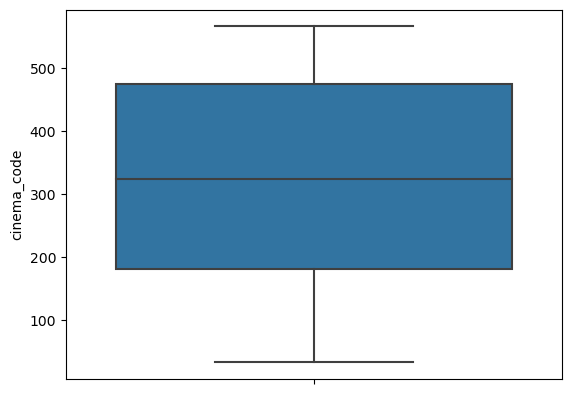

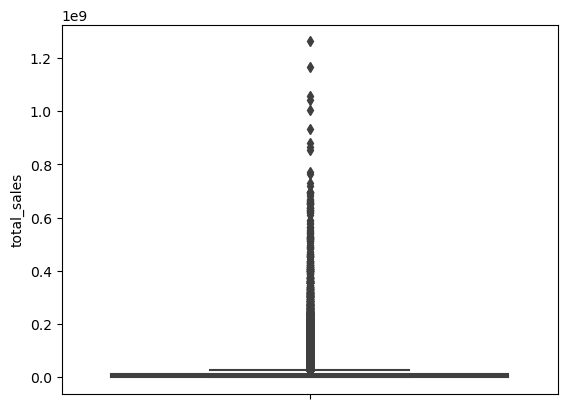

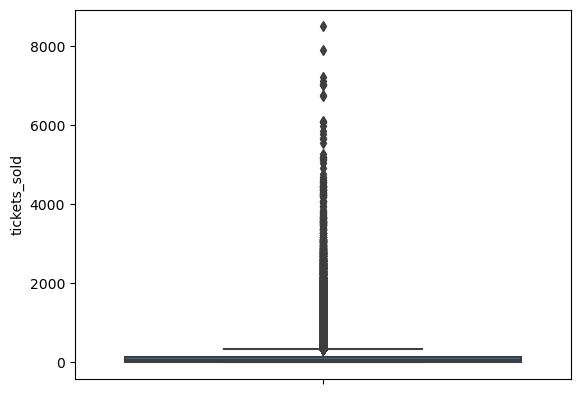

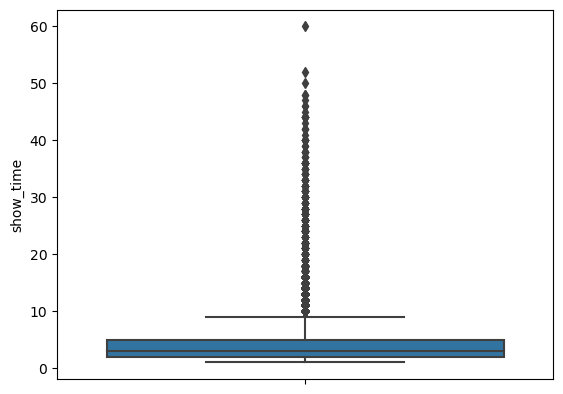

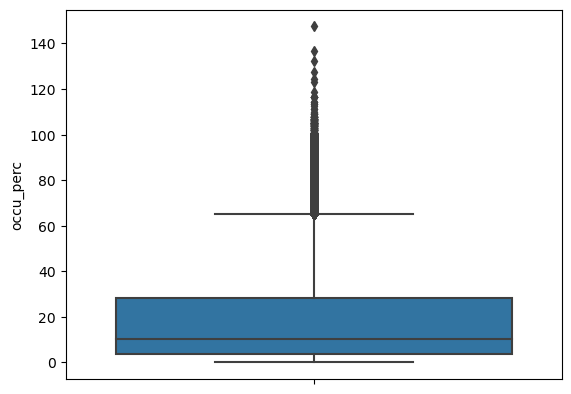

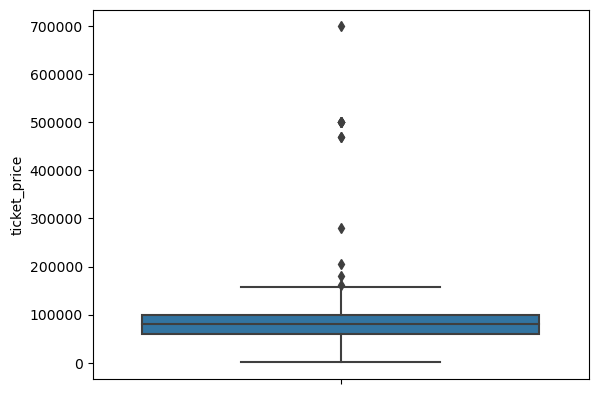

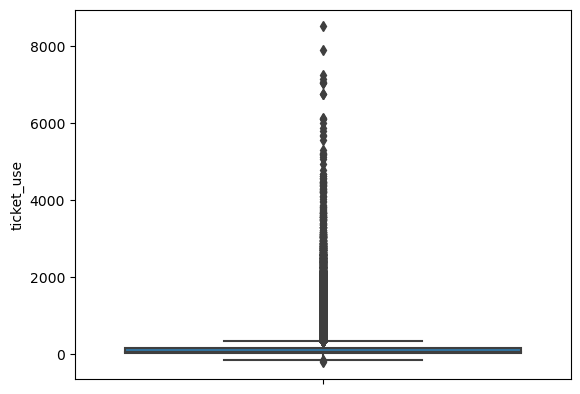

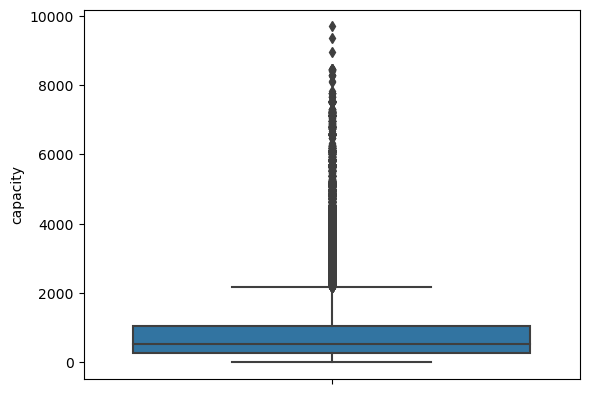

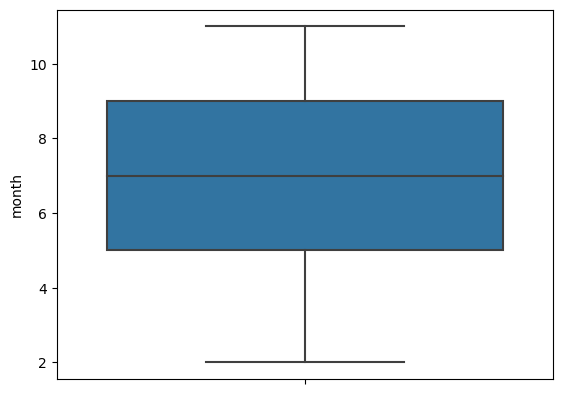

In [20]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

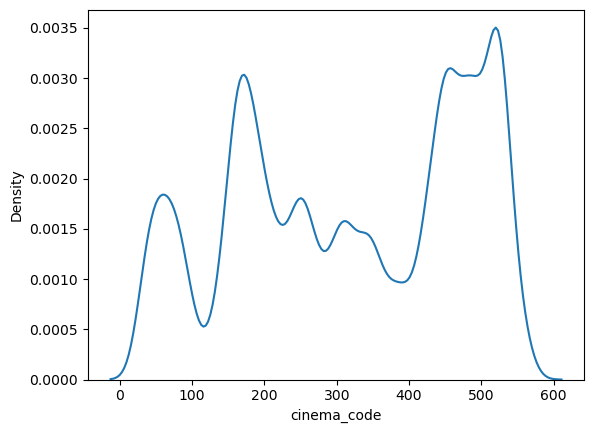

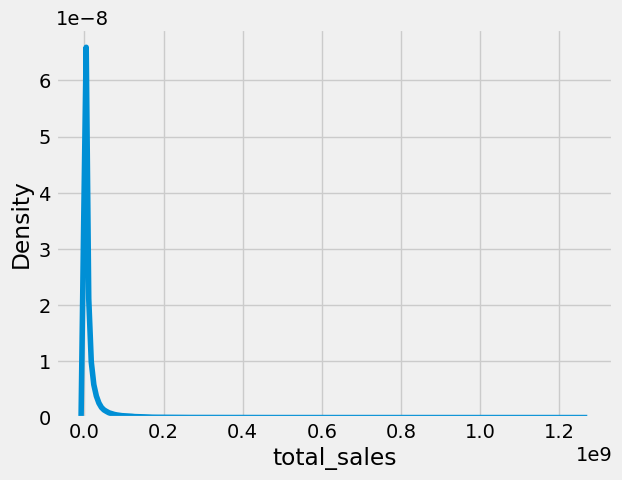

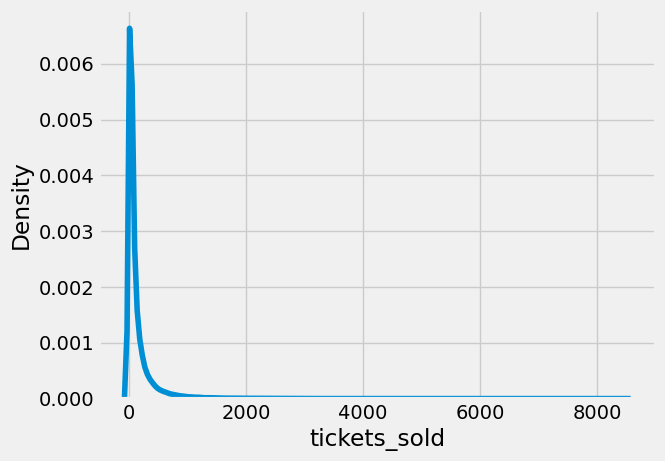

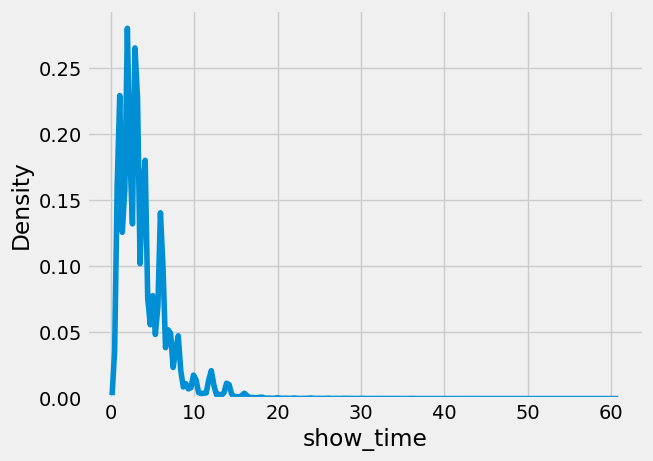

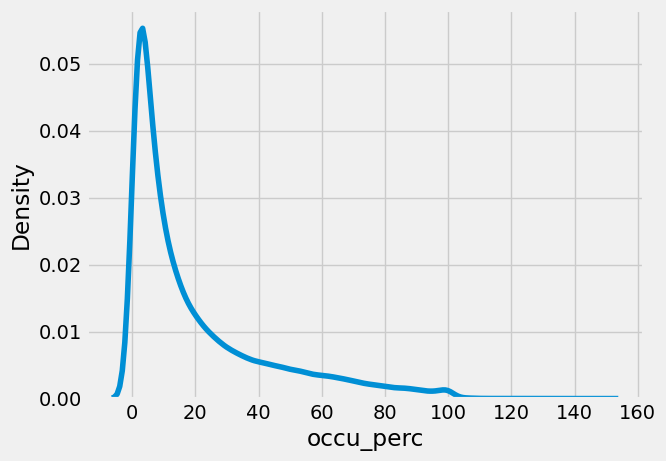

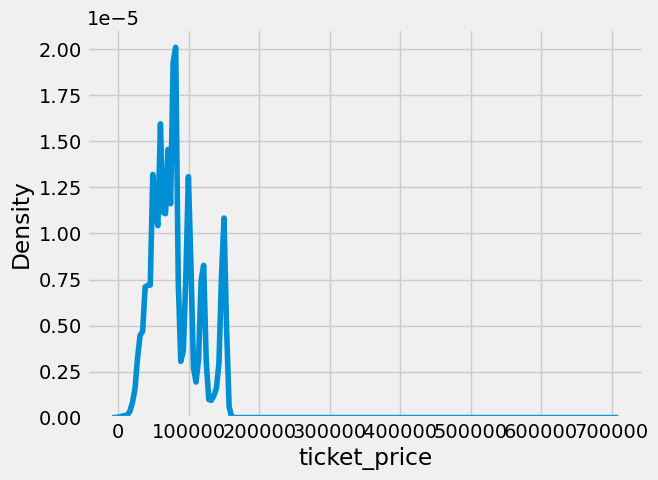

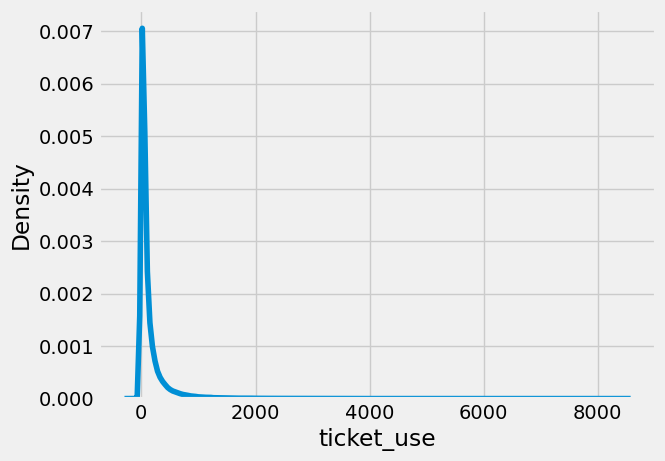

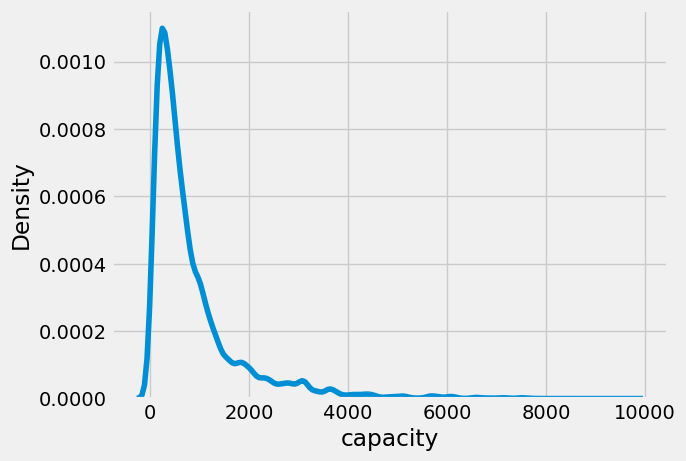

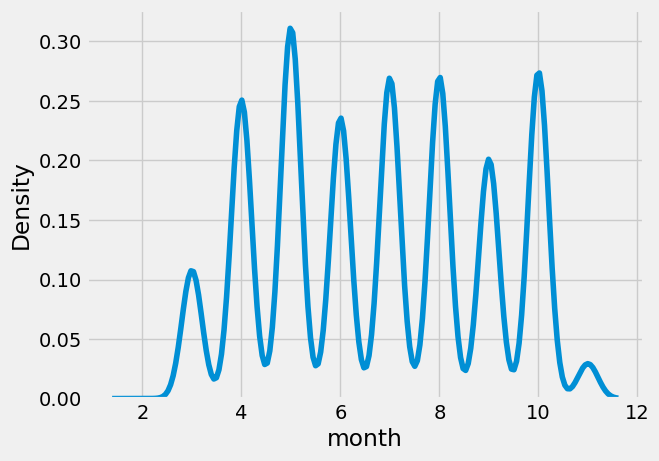

In [21]:
for  i in data.columns:
    if data[i].dtype!='object':
        sns.kdeplot(x=data[i])
        plt.style.use('fivethirtyeight')
        plt.show()

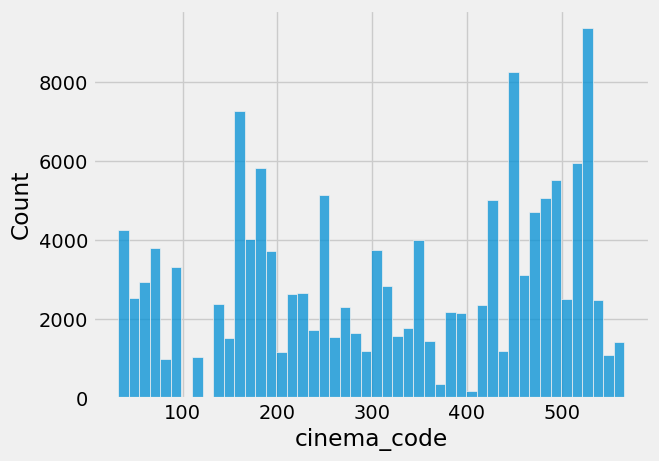

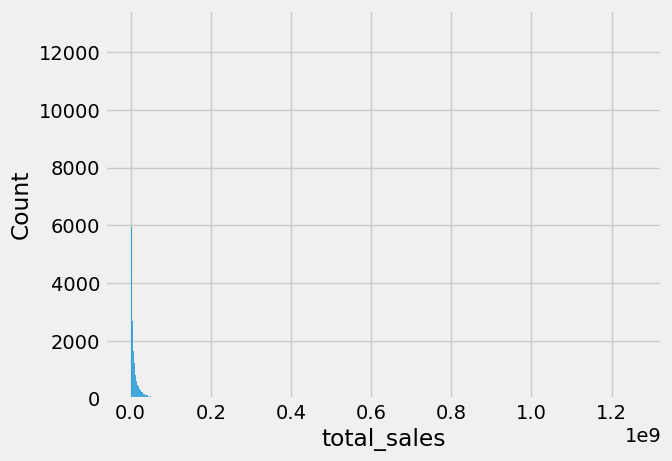

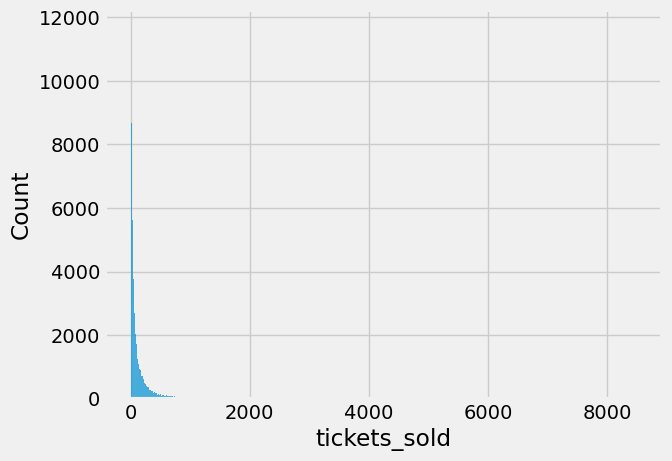

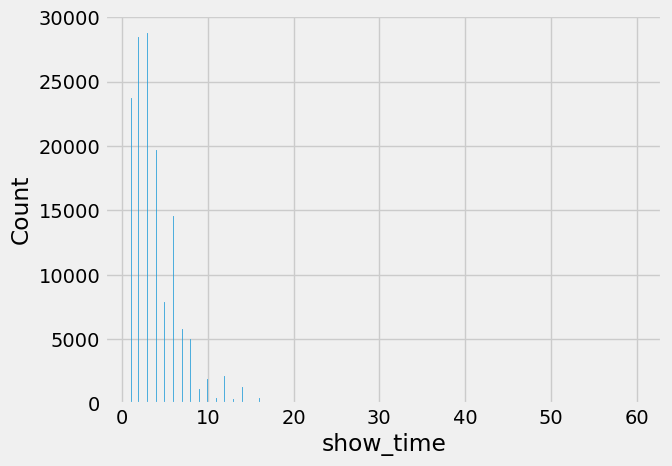

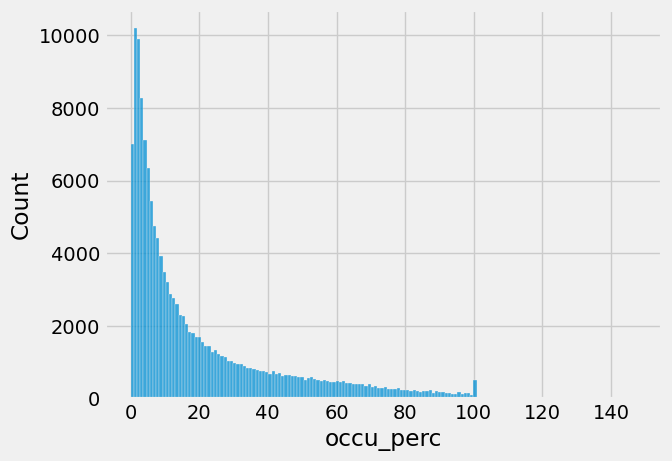

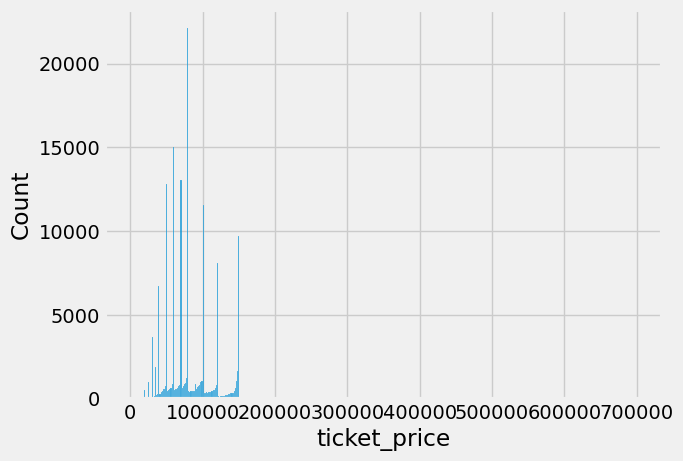

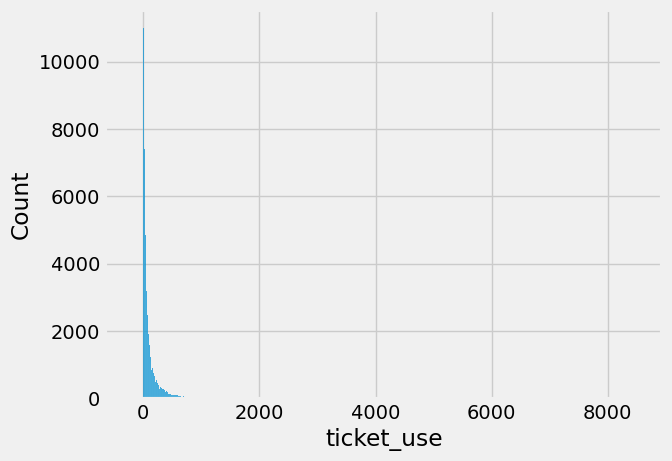

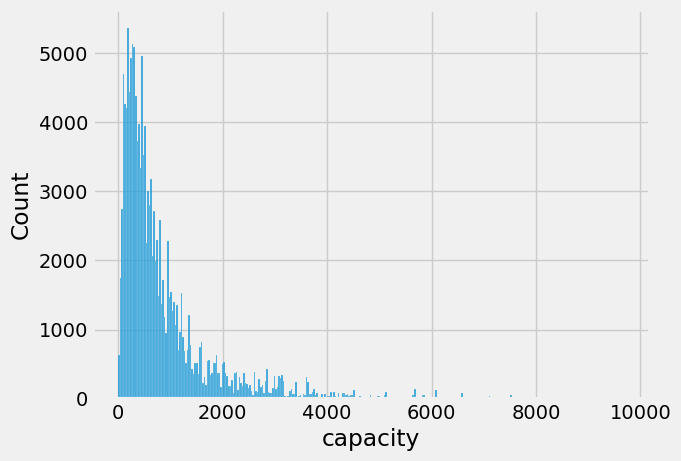

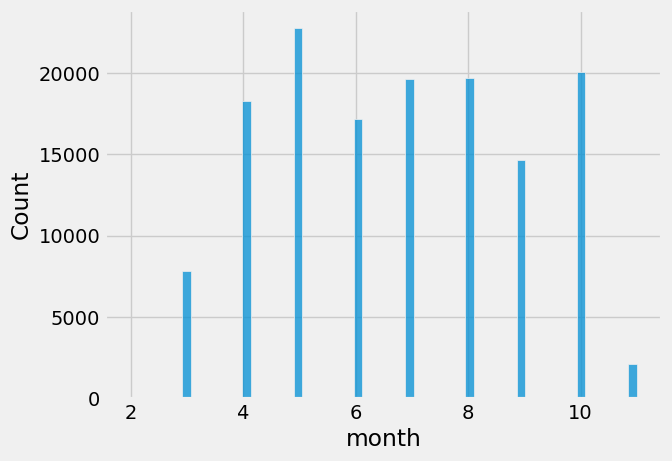

In [22]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.histplot(x=data[i])
        plt.style.use('fivethirtyeight')
        plt.show()

# Multy variate analyse

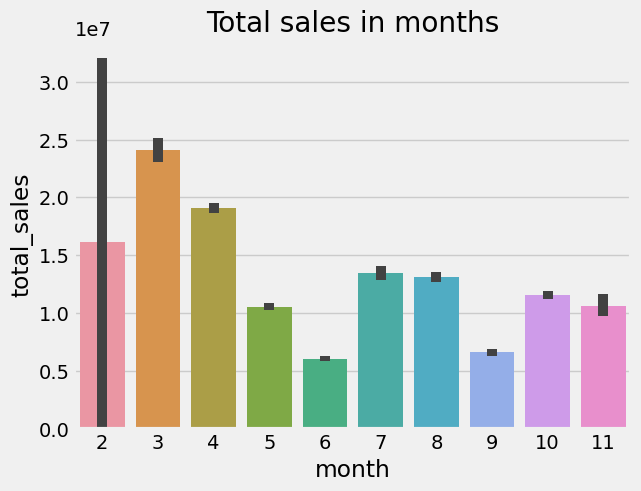

In [23]:
plt.title('Total sales in months')
sns.barplot(x='month',y='total_sales',data=data.sort_values(by='total_sales',ascending=True))
plt.style.use('fivethirtyeight')
plt.show()

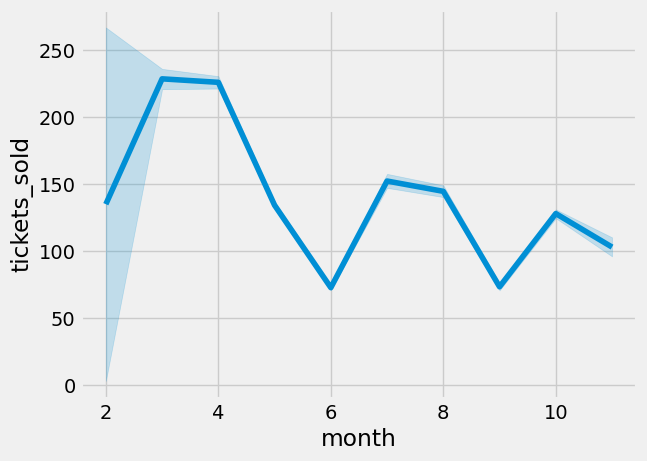

In [24]:
sns.lineplot(x='month',y='tickets_sold',data=data.sort_values(by='month'))
plt.style.use('fivethirtyeight')
plt.title('')
plt.show()

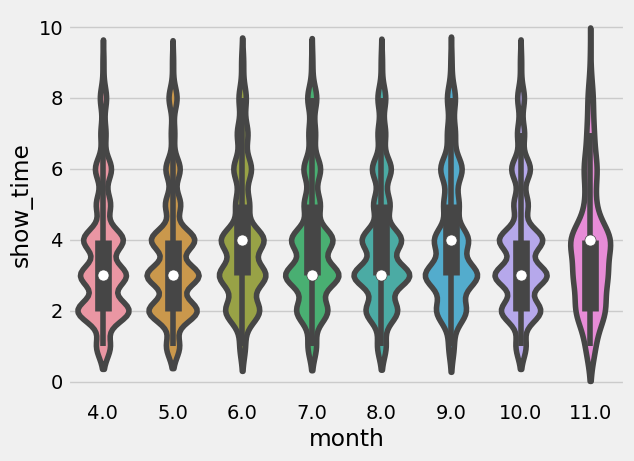

In [44]:

sns.violinplot(x='month',y='show_time',data=data.sort_values(by='month',ascending=True))
plt.style.use('fivethirtyeight')
plt.show()

Text(0.5, 1.0, 'Month with more capacity')

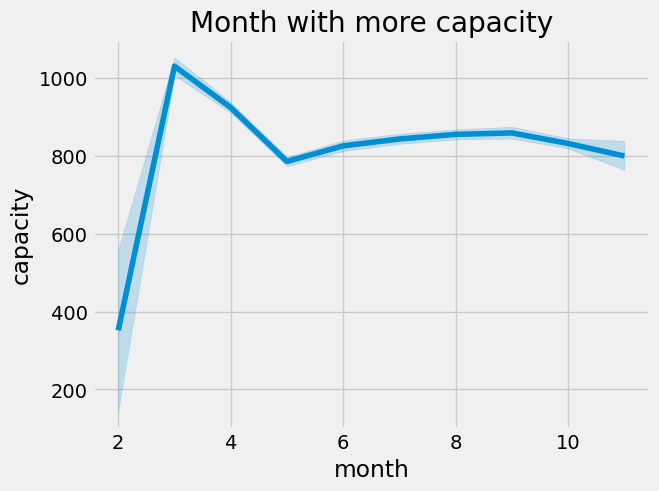

In [26]:
sns.lineplot(x='month',y='capacity',data=data.sort_values(by='month',ascending=True))
plt.title('Month with more capacity')

#  Removing outliers

In [27]:
def outlier_limit (col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5%IQR
    return UL,LL

In [28]:
for i in data.columns:
    if data[i].dtype!= 'object':
        UL,LL=outlier_limit(data[i])
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

In [29]:
data.dropna(inplace=True)

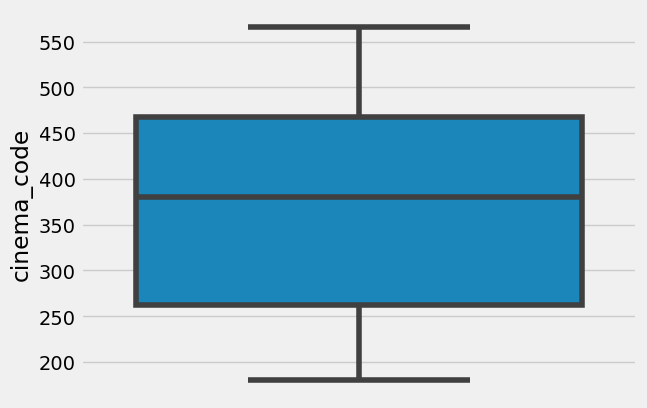

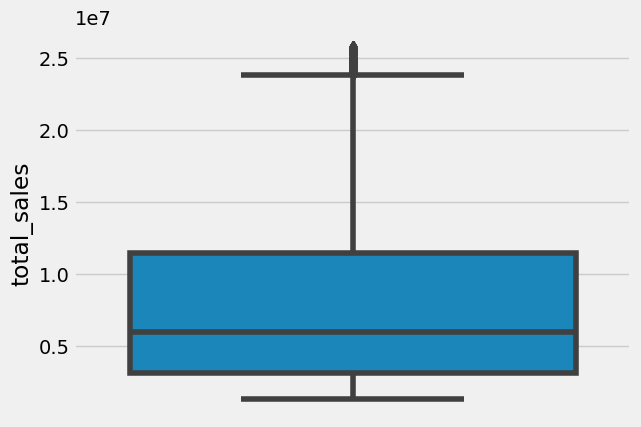

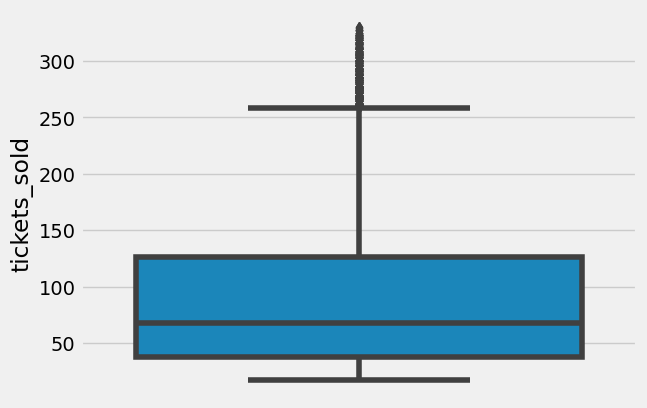

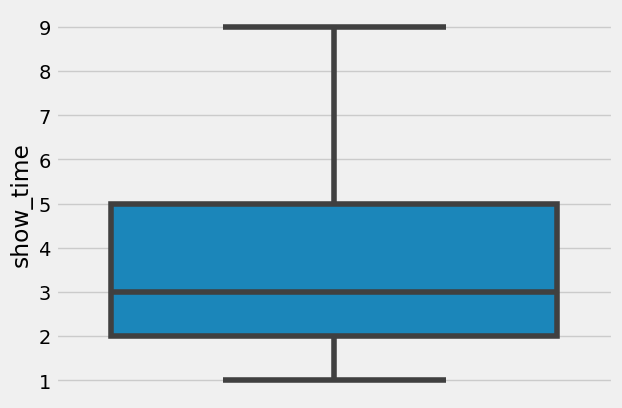

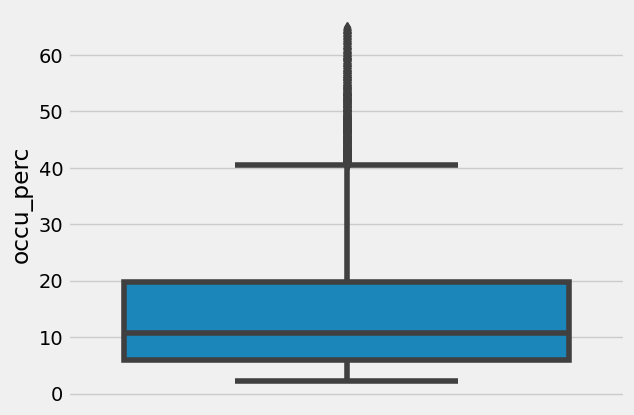

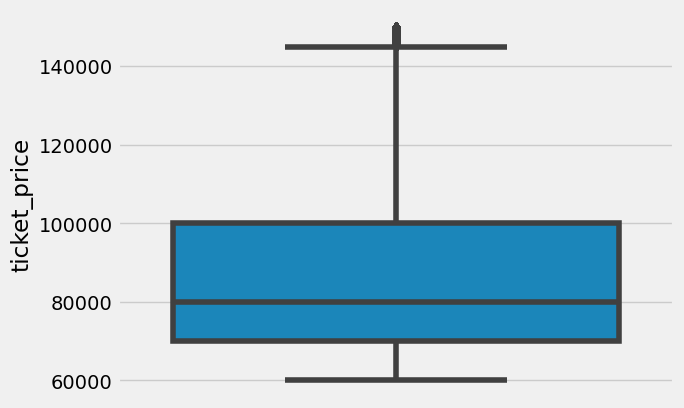

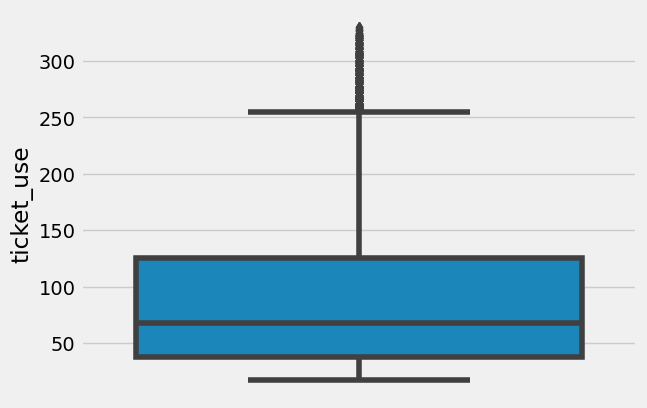

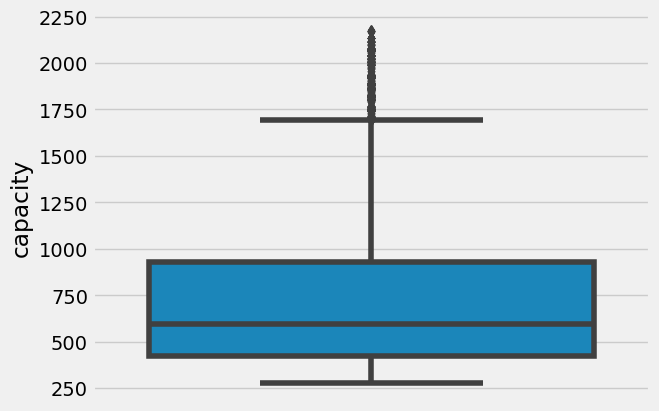

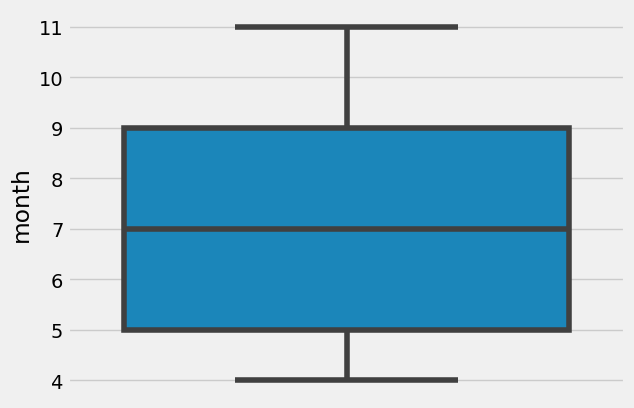

In [30]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

# Checking correlation

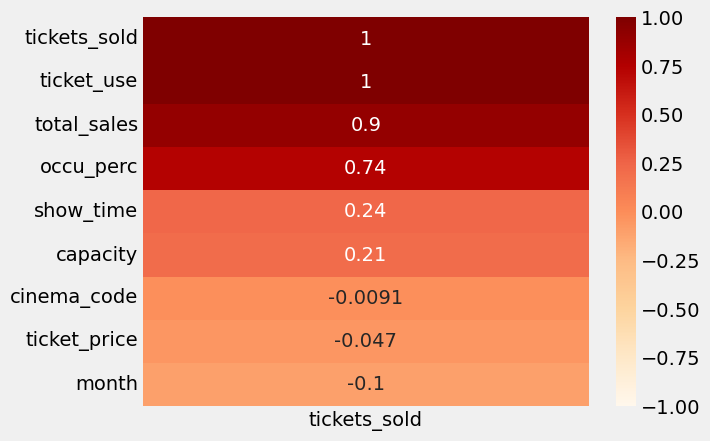

In [31]:
sns.heatmap(data.corr()[['tickets_sold']].sort_values(by='tickets_sold',ascending=False),vmin=-1,vmax=1,annot=True,cmap="OrRd")
plt.show()

### selecting only high correlated values

In [32]:
x=data[['ticket_use','total_sales','occu_perc']].values
y=data[['tickets_sold']].values

### Scaling

In [33]:
rs=RobustScaler()

In [34]:
x=rs.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#  Cross validation

In [36]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [37]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  99.98445190449216
training_score:  99.95720938215794
testing_score:  99.98445190449216
mae:  0.24324012266511016
mse:  0.6596551155741854
rmse_test:  0.812191551035952
****************************************************************************************************
model trained with Ridge
r2score:  99.98442583789699
training_score:  99.95720621177365
testing_score:  99.98442583789699
mae:  0.24386778900667713
mse:  0.6607610364147342
rmse_test:  0.8128720910541425
****************************************************************************************************
model trained with LinearSVR
r2score:  99.98418771212204
training_score:  99.95649268277204
testing_score:  99.98418771212204
mae:  0.11332633788086784
mse:  0.6708639384400744
rmse_test:  0.8190628415696041
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  99.97020150441351
tr

# GradientBoostingRegressor

In [38]:
model=GradientBoostingRegressor()

In [39]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [40]:
y_pred=model.predict(x)

In [41]:
result=pd.DataFrame(zip(y,y_pred),columns=('actual','predicted'),dtype=float)

In [42]:
result

,actual,predicted
0,26.0,26.114613
1,42.0,42.582236
2,112.0,111.730229
3,93.0,93.477470
4,68.0,68.190684
...,...,...
28585,147.0,146.347699
28586,101.0,101.198747
28587,122.0,121.114247
28588,116.0,116.140925


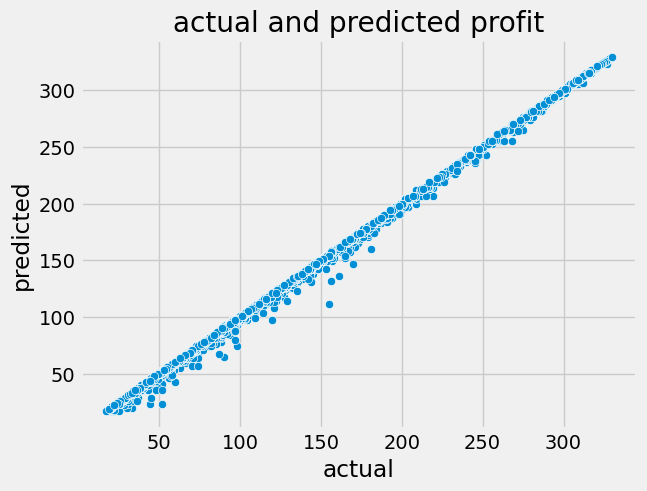

In [43]:
plt.title('actual and predicted profit')
sns.scatterplot(data=result,x='actual',y='predicted')
plt.style.use('fivethirtyeight')